# Running VGG16 on 3D Rope Dataset

This model attempts to classify if a depth image has an intersection or if it doesn't

In [1]:
from PIL import Image
import numpy as np
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

In [2]:
# Set up some global variables
USE_GPU = True

if USE_GPU:
    device = '/device:GPU:0'
else:
    device = '/cpu:0'

# Constant to control how often we print when training models
print_every = 100

print('Using device: ', device)
tf.test.is_gpu_available()

Using device:  /device:GPU:0


True

## Data Preparation

In [3]:
ds = tf.data.TFRecordDataset("assets/non-temporal-3d.tfrec")

In [4]:
image_feature_description = {
    'height'   : tf.io.FixedLenFeature([], tf.int64),
    'width'    : tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
    'position' : tf.io.FixedLenFeature([256], tf.float32),
    'intersect': tf.io.FixedLenFeature([127], tf.int64),
    'has_intersection' : tf.io.FixedLenFeature([], tf.int64)
}

def _parse_img_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_ds = ds.map(_parse_img_function)
print(repr(parsed_ds))

<MapDataset shapes: {has_intersection: (), height: (), image_raw: (), intersect: (127,), position: (256,), width: ()}, types: {has_intersection: tf.int64, height: tf.int64, image_raw: tf.string, intersect: tf.int64, position: tf.float32, width: tf.int64}>


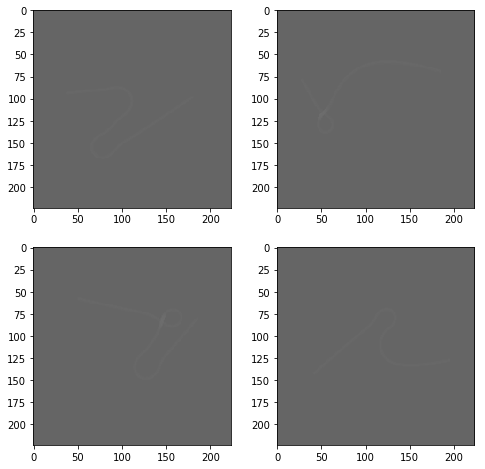

In [5]:
w = 2
h = 2
fig = plt.figure(figsize=(8, 8))

for i, img_features in enumerate(parsed_ds.take(w * h)):
    i += 1
    img = tf.io.decode_raw(img_features['image_raw'], tf.uint8)
    height = tf.cast(img_features['height'], tf.int32)
    width = tf.cast(img_features['width'], tf.int32)
    img = tf.reshape(img, tf.stack([width, height, 3]))
    img = tf.cast(img, dtype=tf.float32)
#     position = tf.reshape(img_features['position'], tf.constant([2,128]))
#     position = tf.transpose(position)
#     intersect = img_features['intersect'] + 1
#     intersect = tf.one_hot(intersect, depth=3)
#     has_intersection = img_features['has_intersection']
#     print(has_intersection)

    fig.add_subplot(h, w, i)
    plt.imshow(img.numpy()/256)


In [6]:
weight_dict = np.load('vgg16_weights.npz')
# print(weight_dict.files)

In [7]:
VGG_MEAN = [103.939, 116.779, 123.68]

class VGG16(tf.keras.Model):
    def __init__(self, vgg16_npy_path, num_classes, load_weights=True):
        super(VGG16, self).__init__()
        
        self.load_weight = load_weights
        
        if self.load_weight:
            self.weight_data = np.load(vgg16_npy_path)
            
            self.conv1_1 = self._build_conv_layer('conv1_1', 64)
            self.conv1_2 = self._build_conv_layer('conv1_2', 64)
            self.pool1 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')
            
            self.conv2_1 = self._build_conv_layer('conv2_1', 128)
            self.conv2_2 = self._build_conv_layer('conv2_2', 128)
            self.pool2 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')
            
            self.conv3_1 = self._build_conv_layer('conv3_1', 256)
            self.conv3_2 = self._build_conv_layer('conv3_2', 256)
            self.conv3_3 = self._build_conv_layer('conv3_3', 256)
            self.pool3 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')

            self.conv4_1 = self._build_conv_layer('conv4_1', 512)
            self.conv4_2 = self._build_conv_layer('conv4_2', 512)
            self.conv4_3 = self._build_conv_layer('conv4_3', 512)
            self.pool4 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')
            
            self.conv5_1 = self._build_conv_layer('conv5_1', 512)
            self.conv5_2 = self._build_conv_layer('conv5_2', 512)
            self.conv5_3 = self._build_conv_layer('conv5_3', 512)
            self.pool5 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')
            
            self.flatten = tf.keras.layers.Flatten()
            
            self.fc6 = self._build_dense_layer('fc6', 1024, tf.keras.layers.ReLU())
            self.fc7 = self._build_dense_layer('fc7', 1024, tf.keras.layers.ReLU())
            self.fc8 = self._build_dense_layer('fc8', num_classes, None)
            
#             self.fc8 = self.dense('fc8', 128, tf.keras.layers.ReLU)
#             self.fc9 = self.denes('fc9', 128, tf.keras)

    def call(self, x, training=False):
        scores = None
        ########################################################################
        # TODO: Implement the forward pass for a three-layer ConvNet. You      #
        # should use the layer objects defined in the __init__ method.         #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        x = tf.reverse(x, axis=[-1]) - tf.constant(VGG_MEAN)
        x = x / 256.0

        x = self.conv1_1(x)
        print(x.shape)
        x = self.conv1_2(x)
        print(x.shape)
        x = self.pool1(x)
        print(x.shape)
        x = self.conv2_1(x)
        print(x.shape)
        x = self.conv2_2(x)
        print(x.shape)
        x = self.pool2(x)
        print(x.shape)
        x = self.conv3_1(x)
        print(x.shape)
        x = self.conv3_2(x)
        print(x.shape)
        x = self.pool3(x)
        print(x.shape)
        x = self.conv4_1(x)
        print(x.shape)
        x = self.conv4_2(x)
        print(x.shape)
        x = self.conv4_3(x)
        print(x.shape)
        x = self.pool4(x)
        print(x.shape)
        x = self.conv5_1(x)
        print(x.shape)
        x = self.conv5_2(x)
        print(x.shape)
        x = self.conv5_3(x)
        print(x.shape)
        x = self.pool5(x)
        print(x.shape)
        x = self.flatten(x)
        print(x.shape)
        x = self.fc6(x)
        print(x.shape)
        x = self.fc7(x)
        print(x.shape)
        scores = self.fc8(x)
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                           END OF YOUR CODE                           #
        ########################################################################        
        return scores
    
    def _build_conv_layer(self, name, filters, kernel=3, stride=(1, 1), trainable=False):
        if self.load_weight:
            k_init = tf.constant_initializer(self.weight_data[name + '_W'])
            b_init = tf.constant_initializer(self.weight_data[name + '_b'])
        else:
            k_init = tf.initializers.VarianceScaling(scale=2.0)
            b_init = tf.initializers.zeros()
        
        conv = tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel, strides=stride, padding='same',
                                      activation=tf.keras.layers.ReLU(), kernel_initializer=k_init, bias_initializer=b_init,
                                      trainable=trainable)
        
        return conv
        
    
    def _build_dense_layer(self, name, hidden_dim, activation, scale=1.0, load_weight=False, trainable=True):
        if load_weight:
            k_init = tf.constant_initializer(self.weight_data[name + '_W'])
            b_init = tf.constant_initializer(self.weight_data[name + '_b'])
        else:
            k_init = tf.initializers.VarianceScaling(scale)
            b_init = tf.initializers.zeros()
        
        dense = tf.keras.layers.Dense(hidden_dim, activation=activation, kernel_initializer=k_init, 
                                      bias_initializer=b_init, trainable=trainable)
        
#         if activation is not None:
#             return activation(dense)
        
        return dense
    

In [11]:
def test_vgg2016():
    model = VGG16('vgg16_weights.npz', 2)
    print(device)
    with tf.device(device):
        x = tf.zeros((64, 224, 224, 3))
        scores = model(x)
        print(scores.shape)

test_vgg2016()

/device:GPU:0
(64, 224, 224, 64)
(64, 224, 224, 64)
(64, 112, 112, 64)
(64, 112, 112, 128)
(64, 112, 112, 128)
(64, 56, 56, 128)
(64, 56, 56, 256)
(64, 56, 56, 256)
(64, 28, 28, 256)
(64, 28, 28, 512)
(64, 28, 28, 512)
(64, 28, 28, 512)
(64, 14, 14, 512)
(64, 14, 14, 512)
(64, 14, 14, 512)
(64, 14, 14, 512)
(64, 7, 7, 512)
(64, 25088)
(64, 1024)
(64, 1024)
(64, 2)
tf.Tensor(
[[0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.07541449]
 [0.09121391 0.0754144